<a href="https://colab.research.google.com/github/dxdiego5/MachineLearning/blob/main/iris_machine_learning_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
## IMPORTAR AS BIBLIOTECAS UTILIZADAS ###

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

##### FUNÇÕES

In [14]:


# FUNÇÕES PARA PLOTAR GRAFICOS

def plotar_grafico_linha(df):
    plt.figure(figsize=(20, 10))
    plt.plot(df)
    plt.show()
    

def plotar_grafico_histograma(df):
    plt.figure(figsize=(15, 10))
    plt.hist(df, 10, rwidth=0.9)
    plt.show()
    

def apresenta_estatisticas(df):
    print(df.describe())


def plotar_grafico_boxplot(df):
    sns.boxplot(df)


def filtro_quartil_amplitude(df):
    
    print("Mínimo ANTES do filtro: ", min(df['coluna_avaliada']))
    print("Máximo ANTES do filtro: ", max(df['coluna_avaliada']))
    print("Total de dados ANTES do filtro: ", (df['coluna_avaliada']).count())
    
    print("")
    
    Q1 = df['coluna_avaliada'].quantile(0.25)
    Q2 = df['coluna_avaliada'].quantile(0.5)
    Q3 = df['coluna_avaliada'].quantile(0.75)
    
    Amp_interquartil = Q3 - Q1
    
    limite_inferior = (Q1 - (1.5 * Amp_interquartil))
    
    limite_superior = (Q3 + (1.5 * Amp_interquartil))
    
    df_mask=df['coluna_avaliada']>limite_inferior
    amplitudePos = df[df_mask]
    
    df_mask=amplitudePos['coluna_avaliada']<limite_superior
    df_final = amplitudePos[df_mask]
    
    print("Mínimo DEPOIS do filtro: ", min(df_final['coluna_avaliada']))
    print("Máximo DEPOIS do filtro: ", max(df_final['coluna_avaliada']))
    print("Total de dados DEPOIS do filtro: ", (df_final['coluna_avaliada']).count())
    
    return df_final


In [15]:

## IMPORTAR O ARQUIVO DE DADOS ###

# df = pd.read_csv('iris_modificado_1.csv', sep=';')
df = pd.read_csv('iris_modificado.csv', sep=';')



## DEFINIR AS COLUNAS DO DATAFRAME ###

df.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']



## VERIFICA A DIMENSÃO DO DATASET ###

df.shape



## VERIFICAR O TIPO DE DADO EM CADA COLUNA ###

df.dtypes



## VERIFICAR AS CLASSES DO DATAFRAME ###

df['Classe'].unique()



## TRANSFORMAR AS CLASSES EM VALORES NUMÉRICOS ###

label_encoder = preprocessing.LabelEncoder()
  
df['Classe']= label_encoder.fit_transform(df['Classe'])
  
# Iris-setosa = 0
# Iris-versicolor = 1
# Iris-virginica = 2


## VERIFICAR AS CLASSES DO DATAFRAME ###

df['Classe'].unique()



## TRANSFORMAR OS DADOS EM VALORES NUMÉRICOS DO TIPO FLOAT ###

columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal']

df[columns] = df[columns].apply(lambda x: x.str.replace(',', '.').astype('float'))



## VERIFICAR ESTATISTICAS DO DATAFRAME ###

df.describe(include='all')



## VERIFICAR SE EXISTEM DADOS VAZIOS NO DATAFRAME ###

verifica_valores_vazios = df.isnull().values.any()



##### ANALISE EXPLORATÓRIA VIA GRÁFICOS E DADOS ESTATÍSTICOS ###texto em itálico

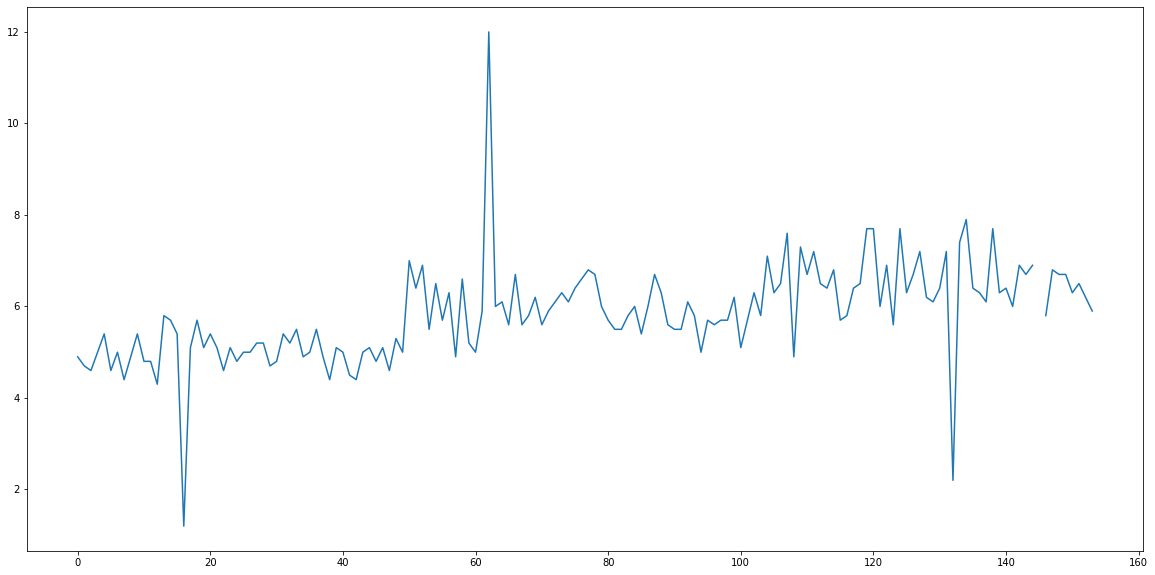

count    153.000000
mean       5.833333
std        1.071030
min        1.200000
25%        5.100000
50%        5.800000
75%        6.400000
max       12.000000
Name: Comprimento_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


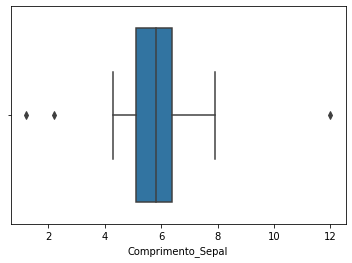

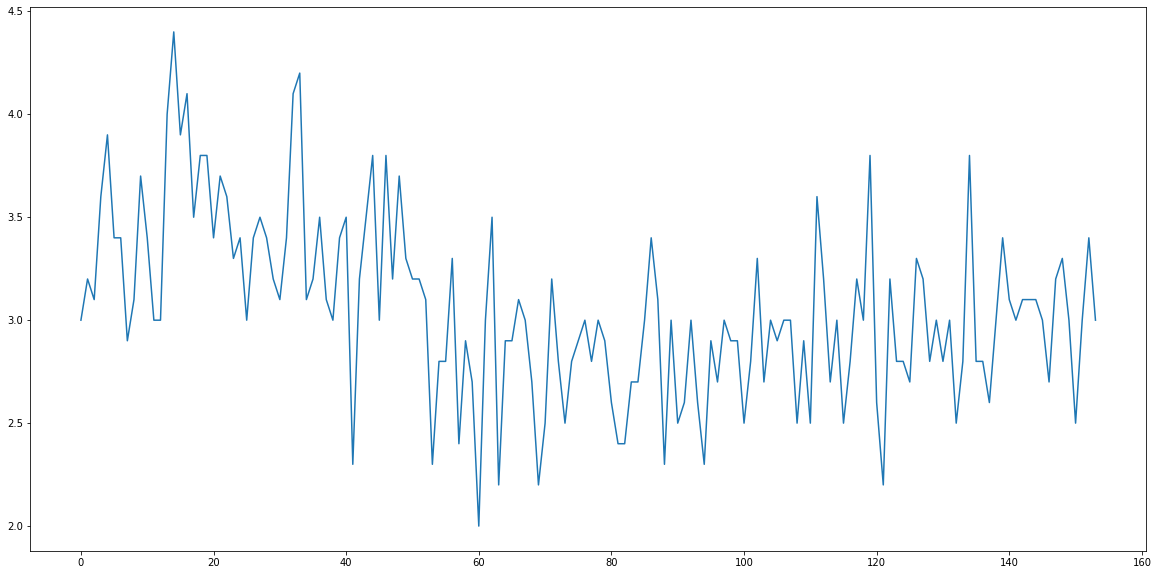

count    154.000000
mean       3.055844
std        0.438653
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Largura_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


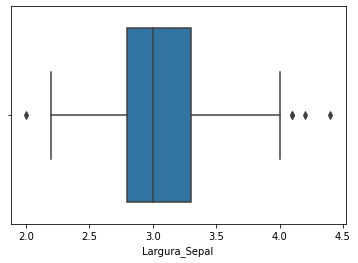

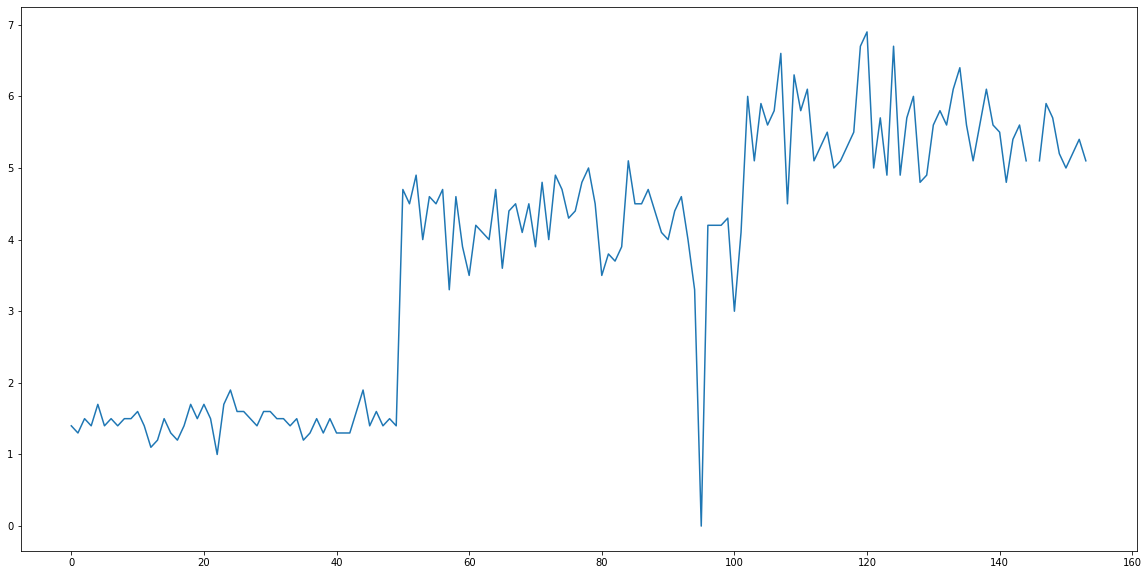

count    153.000000
mean       3.747059
std        1.781597
min        0.000000
25%        1.600000
50%        4.300000
75%        5.100000
max        6.900000
Name: Comprimento_Petal, dtype: float64


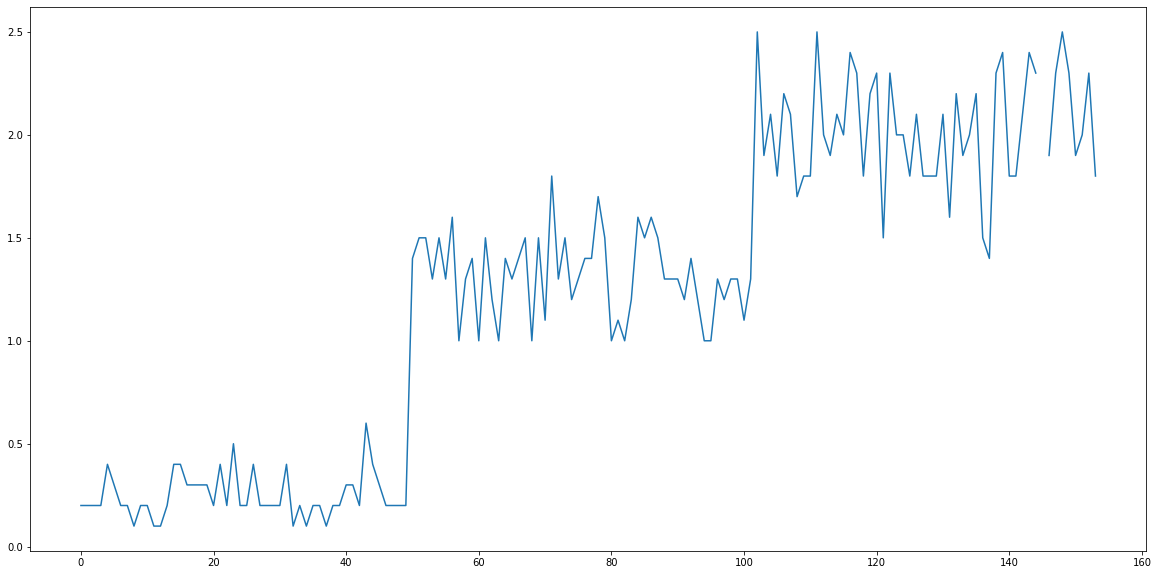

count    153.000000
mean       1.204575
std        0.759271
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Largura_Petal, dtype: float64


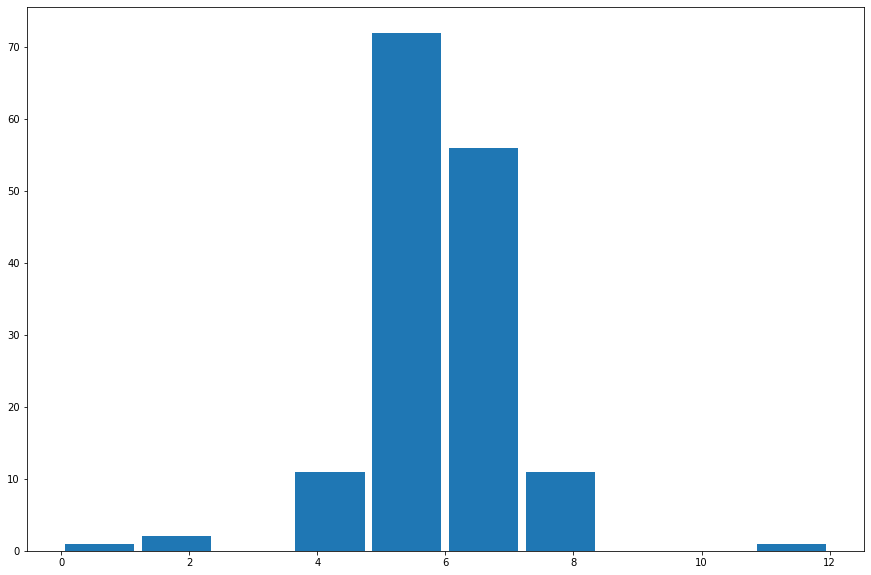

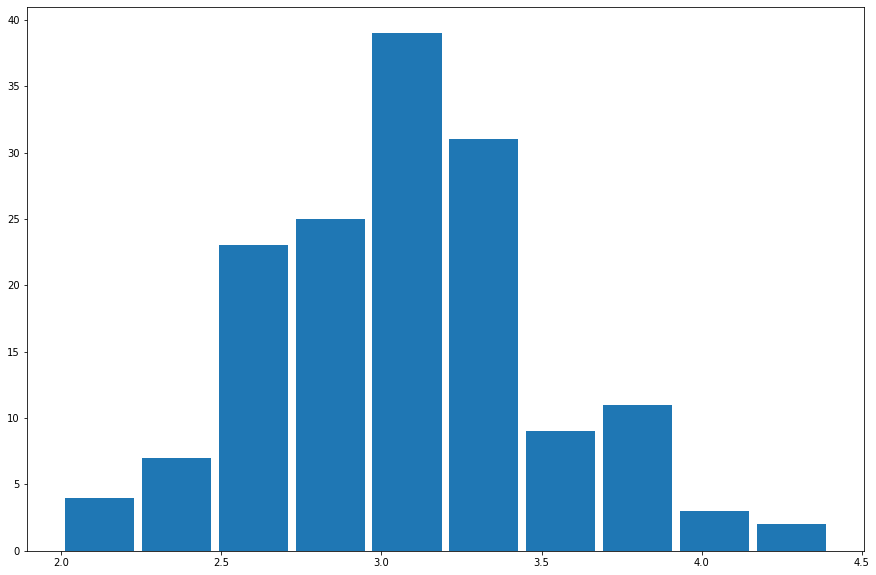

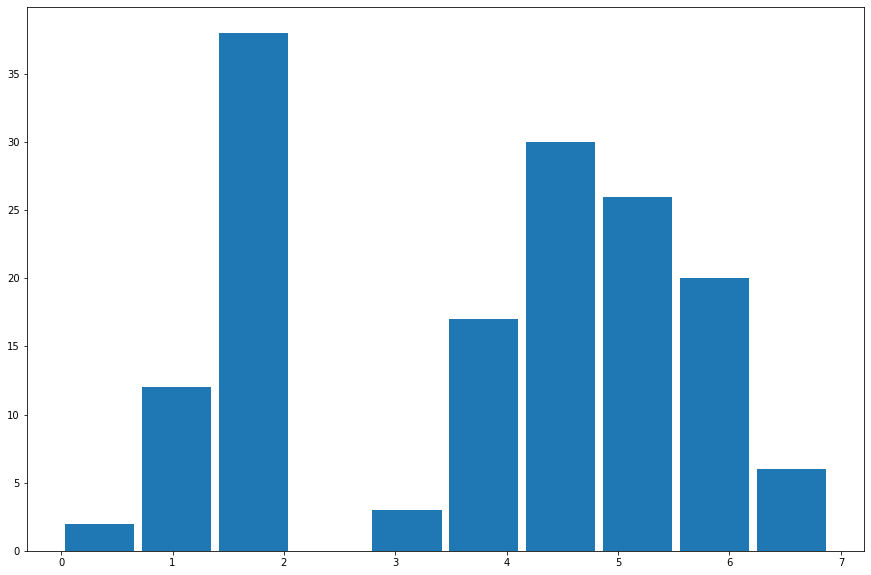

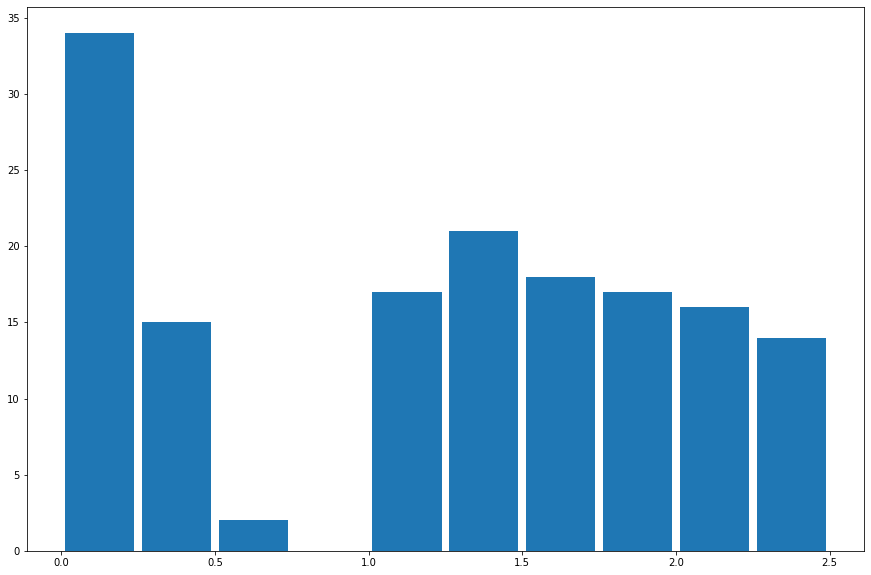

In [16]:




plotar_grafico_linha(df["Comprimento_Sepal"])
apresenta_estatisticas(df["Comprimento_Sepal"])
plotar_grafico_boxplot(df["Comprimento_Sepal"])

#### Analise com histogramas também é importante, porem não podem existir valores em branco nos dados
# plotar_grafico_histograma(df["Comprimento_Sepal"])


plotar_grafico_linha(df["Largura_Sepal"])
apresenta_estatisticas(df["Largura_Sepal"])
plotar_grafico_boxplot(df["Largura_Sepal"])

#### Analise com histogramas também é importante, porem não podem existir valores em branco nos dados
# plotar_grafico_histograma(df["Largura_Sepal"])


plotar_grafico_linha(df["Comprimento_Petal"])
apresenta_estatisticas(df["Comprimento_Petal"])
# plotar_grafico_boxplot(df["Comprimento_Petal"])

#### Analise com histogramas também é importante, porem não podem existir valores em branco nos dados
# plotar_grafico_histograma(df["Comprimento_Petal"])


plotar_grafico_linha(df["Largura_Petal"])
apresenta_estatisticas(df["Largura_Petal"])
# plotar_grafico_boxplot(df["Largura_Petal"])

#### Analise com histogramas também é importante, porem não podem existir valores em branco nos dados
# plotar_grafico_histograma(df["Largura_Petal"])




## TRATAR OS DADOS VAZIOS 'NAN' ###
# OPÇÃO 01: EXCLUIR AS LINHAS QUE CONTENHAM DADOS NAN

df_sem_valores_nan = df.dropna()



# OPÇÃO 02: SUBSTITUIR OS VALORES POR VALORES ZERO

df = df.replace(np.nan, 0, regex=True)


# OPÇÃO 03: SUBSTITUIR OS VALORES POR VALORES DA MÉDIA, NESSE CASO PRECISA VERIFICAR BEM CERTO QUAIS VALORES MÉDIOS USAR

df["Comprimento_Sepal"] = df["Comprimento_Sepal"].replace(np.nan, df["Comprimento_Sepal"].mean(), regex=True)


plotar_grafico_histograma(df["Comprimento_Sepal"])
plotar_grafico_histograma(df["Largura_Sepal"])
plotar_grafico_histograma(df["Comprimento_Petal"])
plotar_grafico_histograma(df["Largura_Petal"])

## SEPARANDO O DATAFRAME PARA ANALISAR CADA UMA DAS CLASSES

df_mask = df_sem_valores_nan['Classe'] == 0
df_Iris_setosa = df_sem_valores_nan[df_mask]


df_mask = df_sem_valores_nan['Classe'] == 1
df_Iris_versicolor = df_sem_valores_nan[df_mask]


df_mask = df_sem_valores_nan['Classe'] == 2
df_Iris_virginica = df_sem_valores_nan[df_mask]


##### Analise Iris Setosa

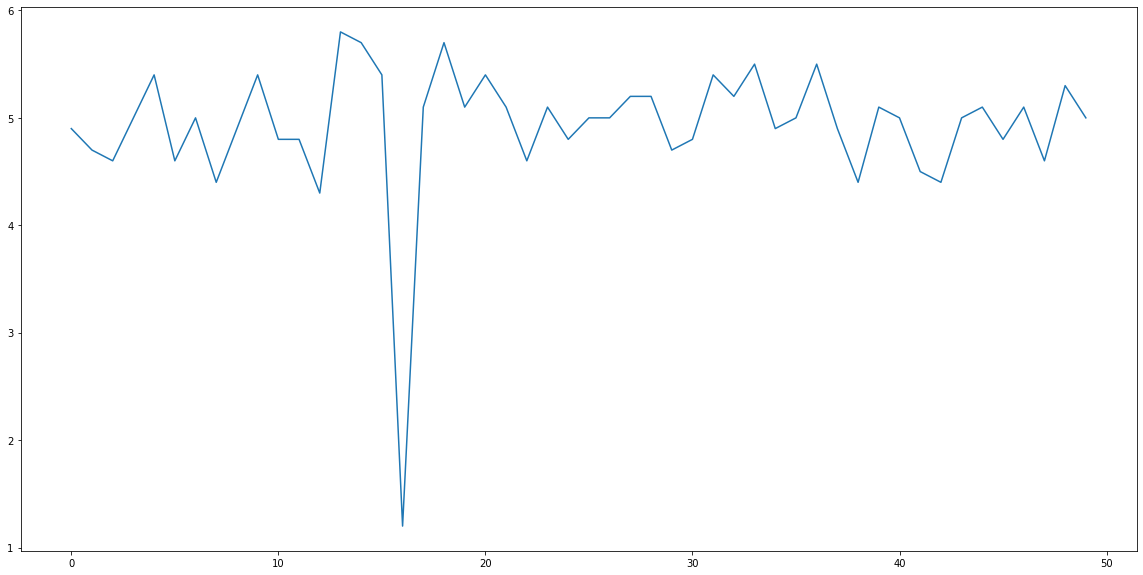

count    50.000000
mean      4.928000
std       0.643029
min       1.200000
25%       4.800000
50%       5.000000
75%       5.200000
max       5.800000
Name: Comprimento_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


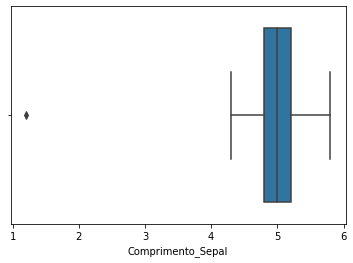

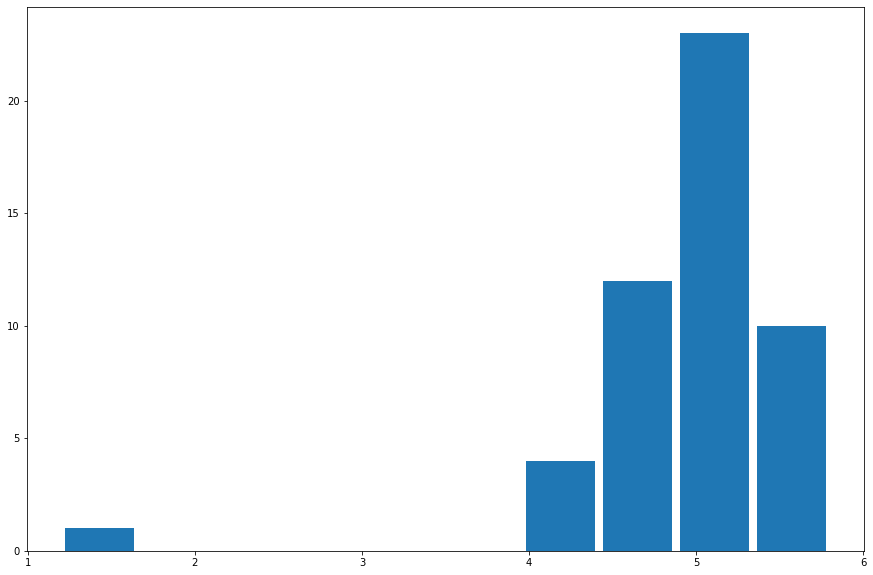

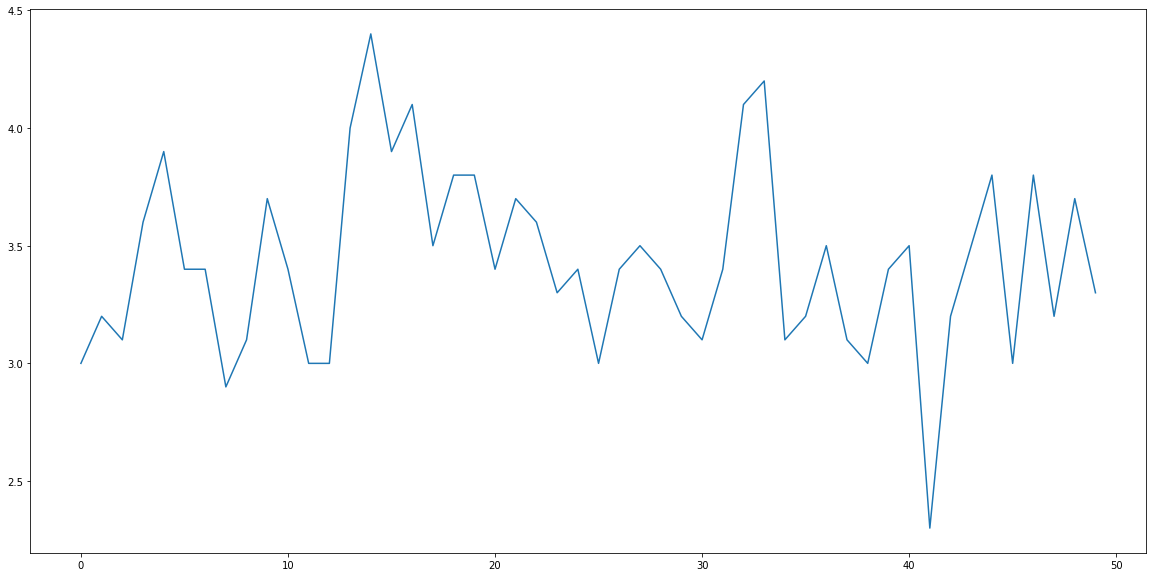

count    50.000000
mean      3.430000
std       0.392922
min       2.300000
25%       3.125000
50%       3.400000
75%       3.700000
max       4.400000
Name: Largura_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


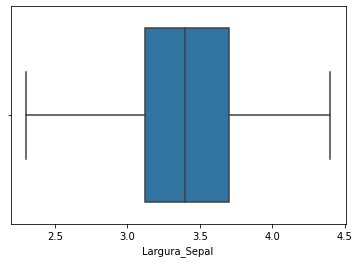

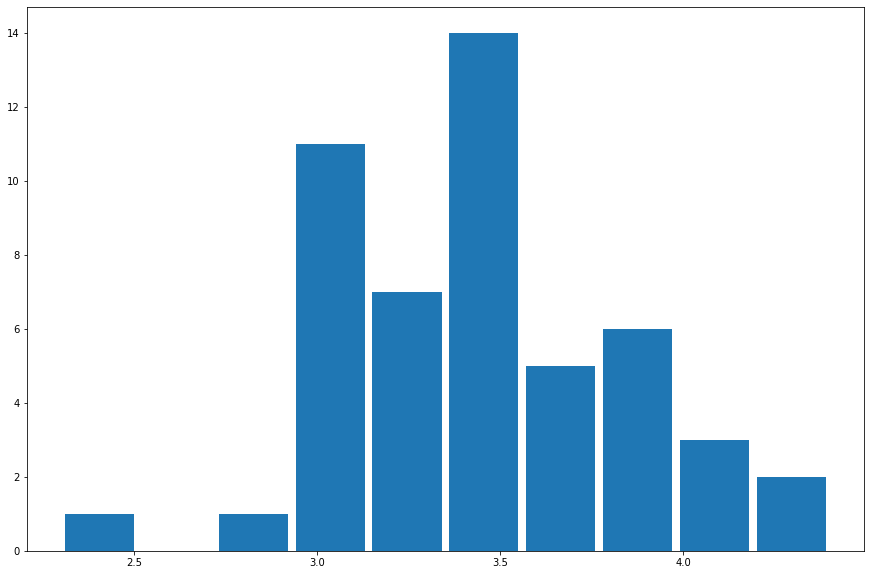

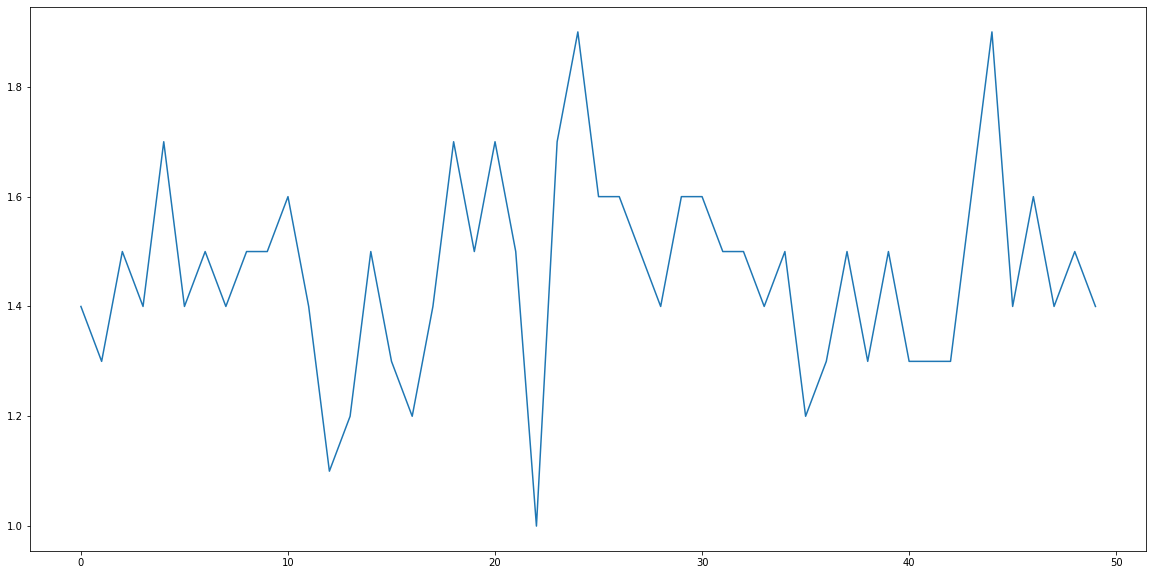

count    50.000000
mean      1.460000
std       0.177281
min       1.000000
25%       1.400000
50%       1.500000
75%       1.575000
max       1.900000
Name: Comprimento_Petal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


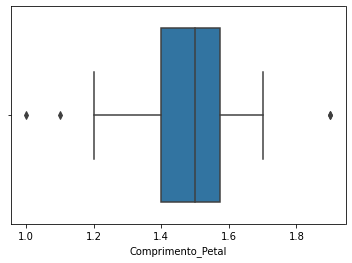

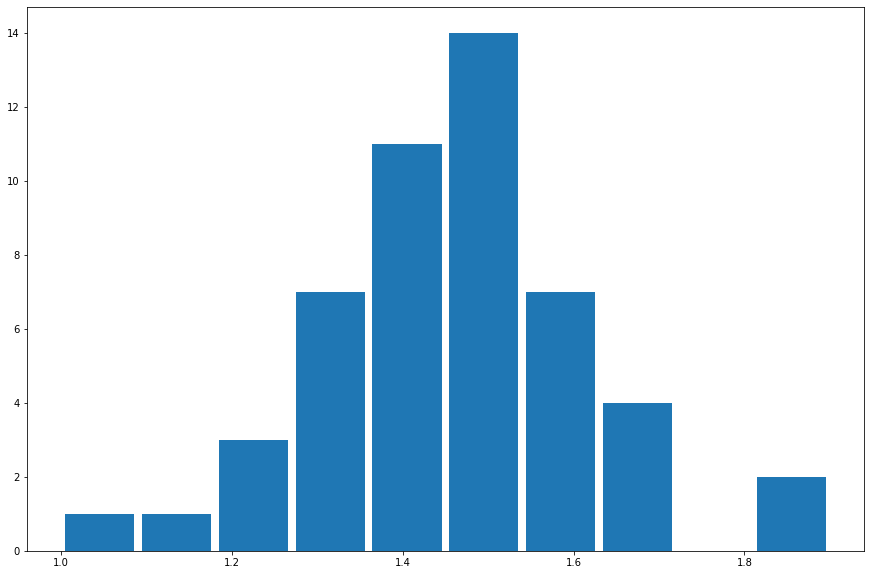

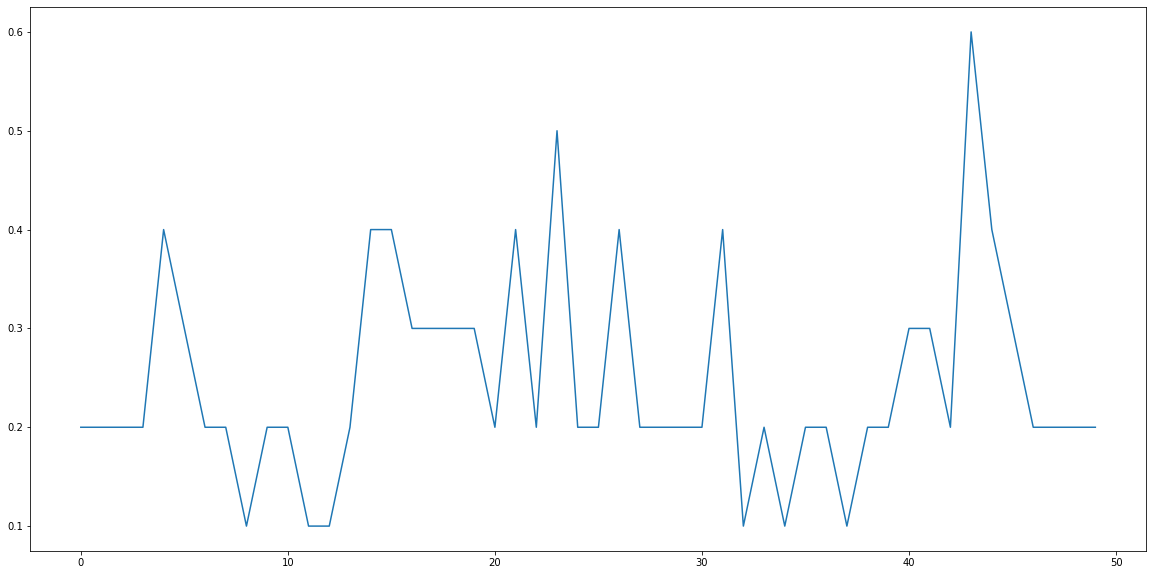

count    50.000000
mean      0.246000
std       0.107305
min       0.100000
25%       0.200000
50%       0.200000
75%       0.300000
max       0.600000
Name: Largura_Petal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


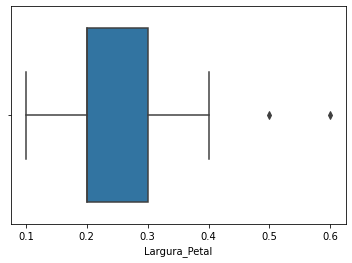

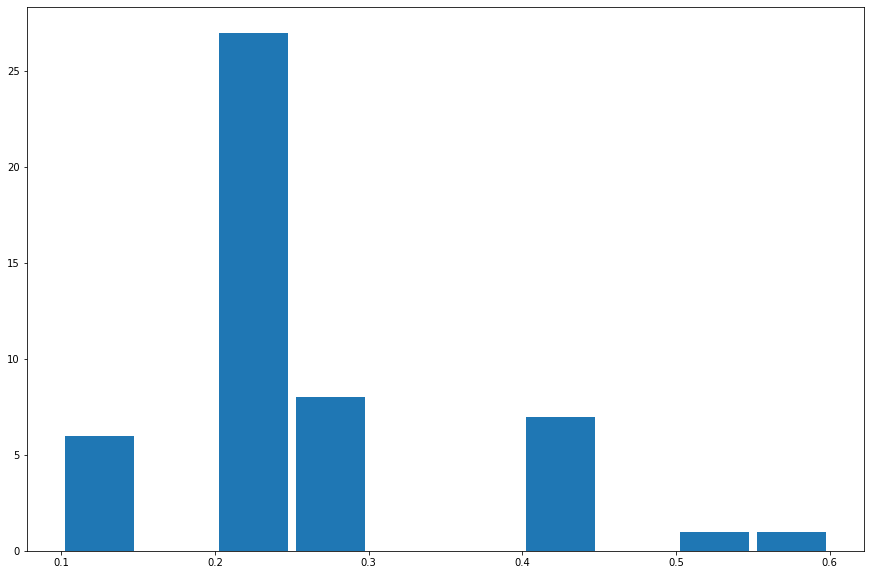

Mínimo ANTES do filtro:  1.2
Máximo ANTES do filtro:  5.8
Total de dados ANTES do filtro:  50

Mínimo DEPOIS do filtro:  4.3
Máximo DEPOIS do filtro:  5.8
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


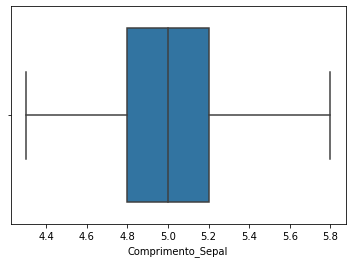

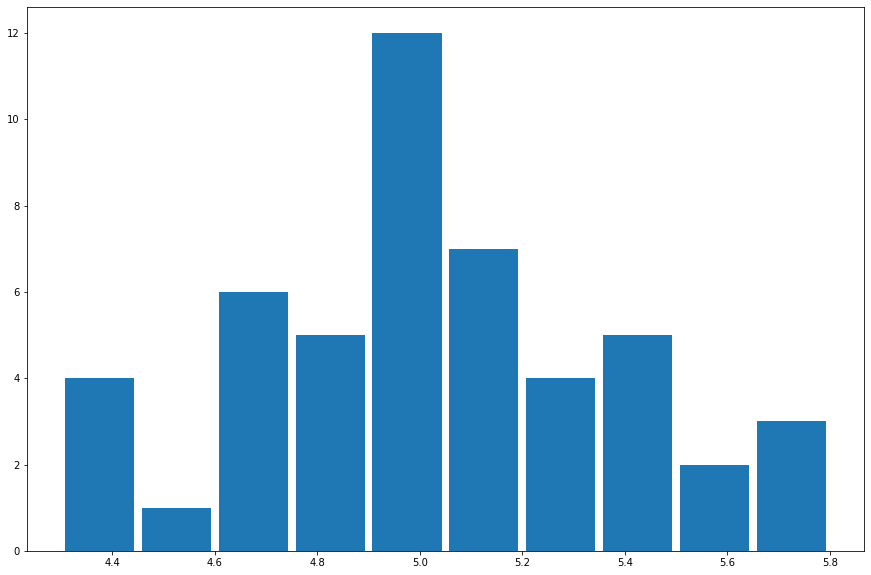

Mínimo ANTES do filtro:  2.3
Máximo ANTES do filtro:  4.4
Total de dados ANTES do filtro:  49

Mínimo DEPOIS do filtro:  2.3
Máximo DEPOIS do filtro:  4.4
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


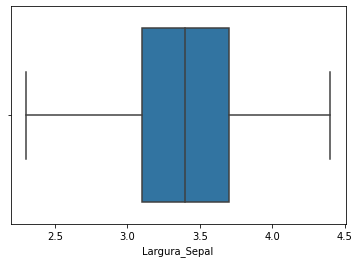

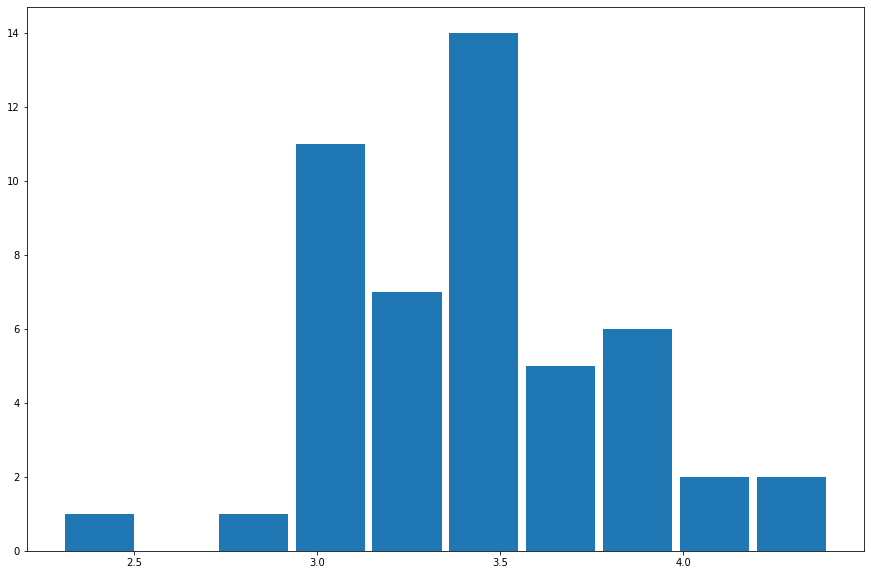

Mínimo ANTES do filtro:  1.0
Máximo ANTES do filtro:  1.9
Total de dados ANTES do filtro:  49

Mínimo DEPOIS do filtro:  1.1
Máximo DEPOIS do filtro:  1.9
Total de dados DEPOIS do filtro:  48


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


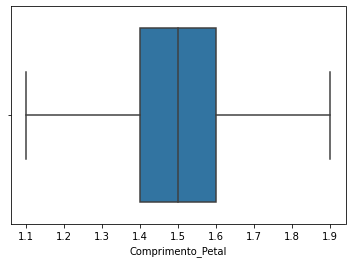

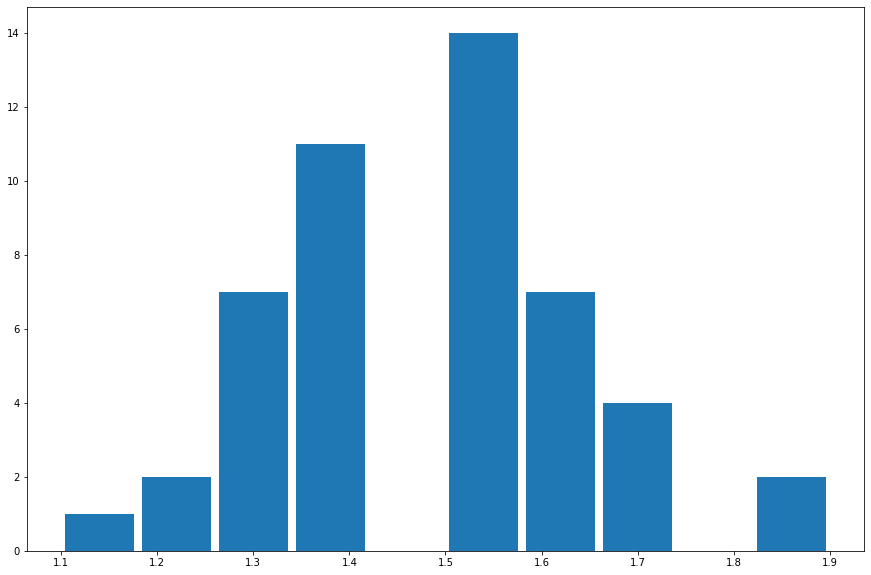

Mínimo ANTES do filtro:  0.1
Máximo ANTES do filtro:  0.6
Total de dados ANTES do filtro:  48

Mínimo DEPOIS do filtro:  0.1
Máximo DEPOIS do filtro:  0.4
Total de dados DEPOIS do filtro:  46


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


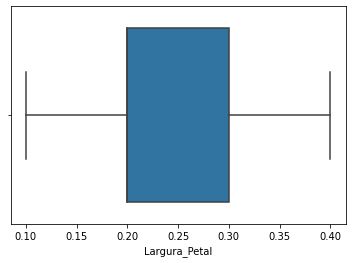

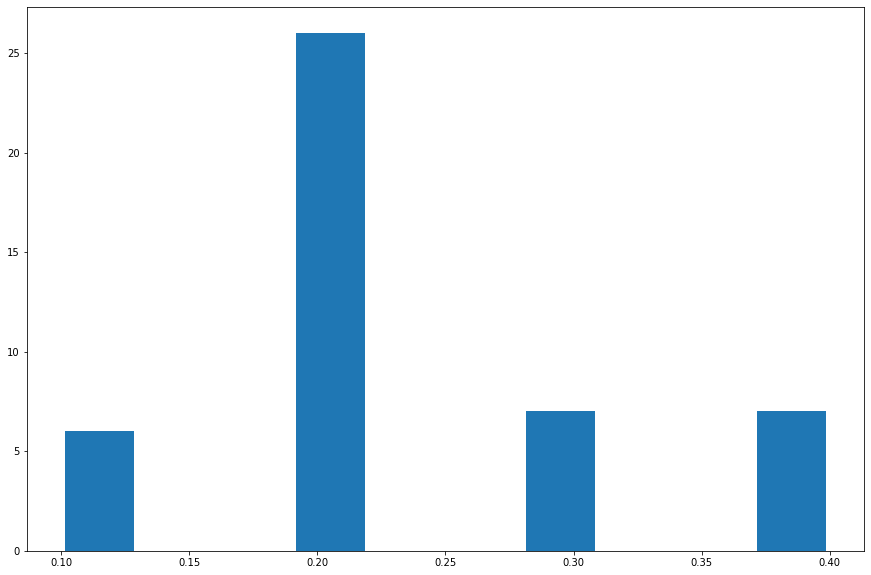

In [18]:
## ANALISE EXPLORATÓRIA VIA GRÁFICOS E DADOS ESTATÍSTICOS PARA ANALISAR CADA UMA DAS CLASSES ###

# Iris_setosa

plotar_grafico_linha(df_Iris_setosa["Comprimento_Sepal"])
apresenta_estatisticas(df_Iris_setosa["Comprimento_Sepal"])
plotar_grafico_boxplot(df_Iris_setosa["Comprimento_Sepal"])
plotar_grafico_histograma(df_Iris_setosa["Comprimento_Sepal"])

plotar_grafico_linha(df_Iris_setosa["Largura_Sepal"])
apresenta_estatisticas(df_Iris_setosa["Largura_Sepal"])
plotar_grafico_boxplot(df_Iris_setosa["Largura_Sepal"])
plotar_grafico_histograma(df_Iris_setosa["Largura_Sepal"])


plotar_grafico_linha(df_Iris_setosa["Comprimento_Petal"])
apresenta_estatisticas(df_Iris_setosa["Comprimento_Petal"])
plotar_grafico_boxplot(df_Iris_setosa["Comprimento_Petal"])
plotar_grafico_histograma(df_Iris_setosa["Comprimento_Petal"])


plotar_grafico_linha(df_Iris_setosa["Largura_Petal"])
apresenta_estatisticas(df_Iris_setosa["Largura_Petal"])
plotar_grafico_boxplot(df_Iris_setosa["Largura_Petal"])
plotar_grafico_histograma(df_Iris_setosa["Largura_Petal"])

## EXCLUINDO OUTLIERS USANDO A TÉCNICA DE QUARTIL ###

# Iris_setosa - Comprimento_Sepal 

df_Iris_setosa_pre_filtro = df_Iris_setosa

df_Iris_setosa_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_setosa_filtrado["Comprimento_Sepal"])

plotar_grafico_histograma(df_Iris_setosa_filtrado["Comprimento_Sepal"])


# Iris_setosa - Largura_Sepal 

df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_setosa_filtrado["Largura_Sepal"])

plotar_grafico_histograma(df_Iris_setosa_filtrado["Largura_Sepal"])

# Iris_setosa - Comprimento_Petal 

df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_setosa_filtrado["Comprimento_Petal"])

plotar_grafico_histograma(df_Iris_setosa_filtrado["Comprimento_Petal"])

# Iris_setosa - Largura_Petal 

df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_setosa_filtrado["Largura_Petal"])

plotar_grafico_histograma(df_Iris_setosa_filtrado["Largura_Petal"])

##### Analise Iris Virginica

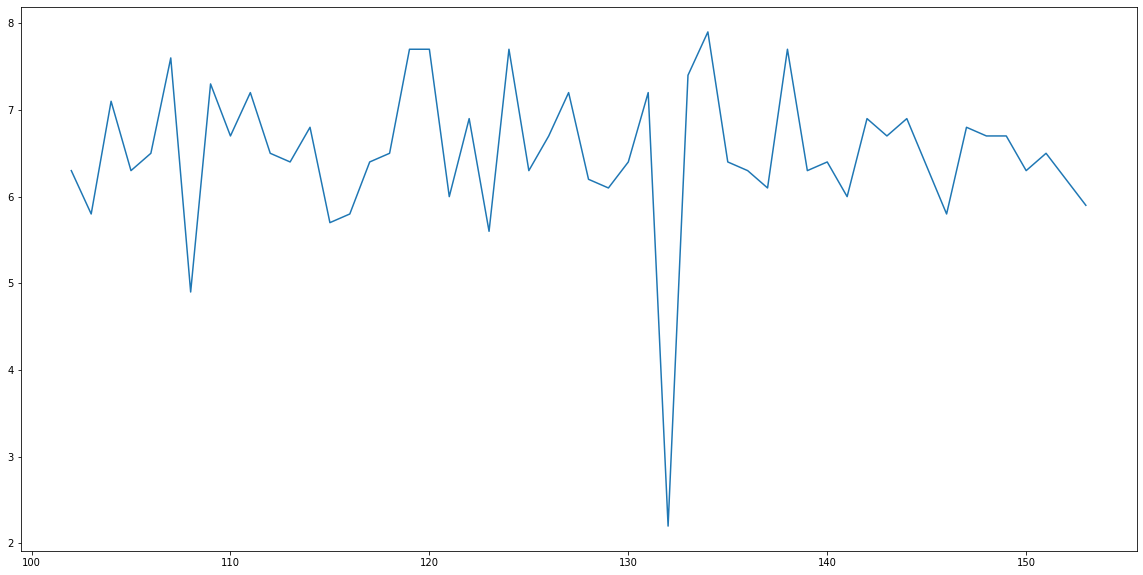

count    51.000000
mean      6.501961
std       0.879657
min       2.200000
25%       6.200000
50%       6.500000
75%       6.900000
max       7.900000
Name: Comprimento_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


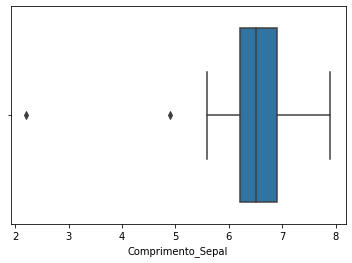

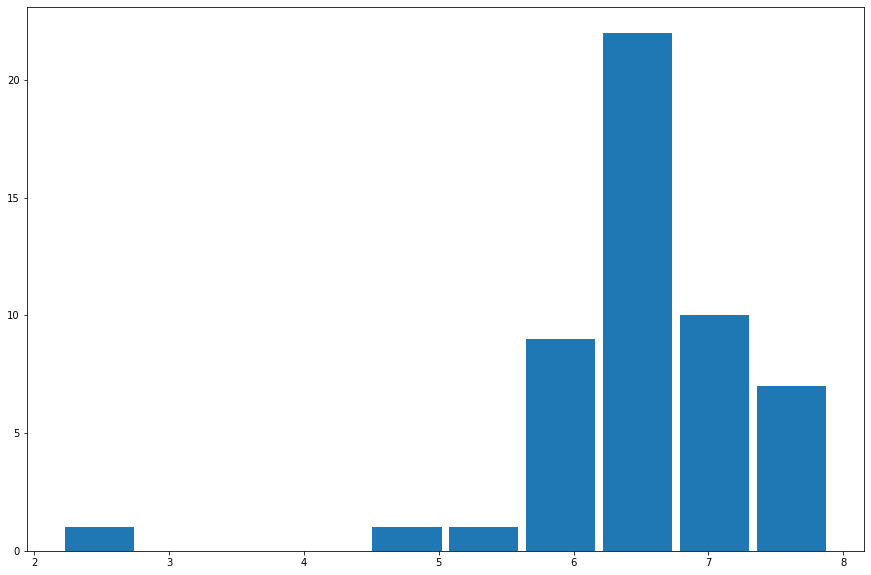

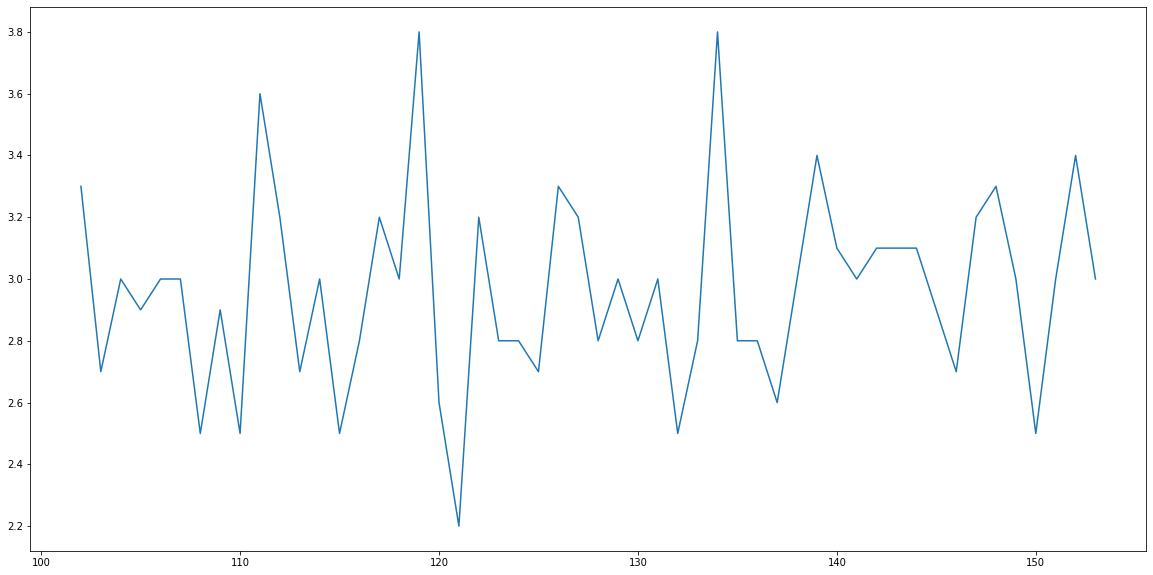

count    51.000000
mean      2.964706
std       0.326082
min       2.200000
25%       2.800000
50%       3.000000
75%       3.150000
max       3.800000
Name: Largura_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


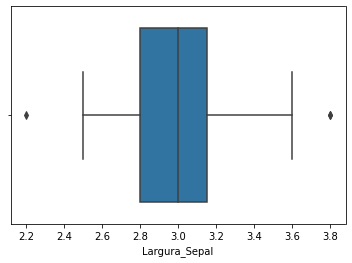

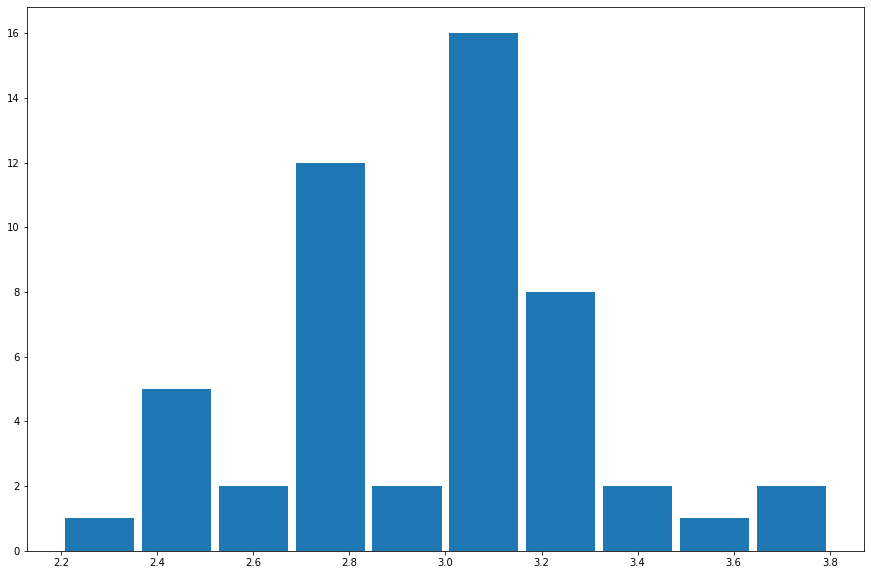

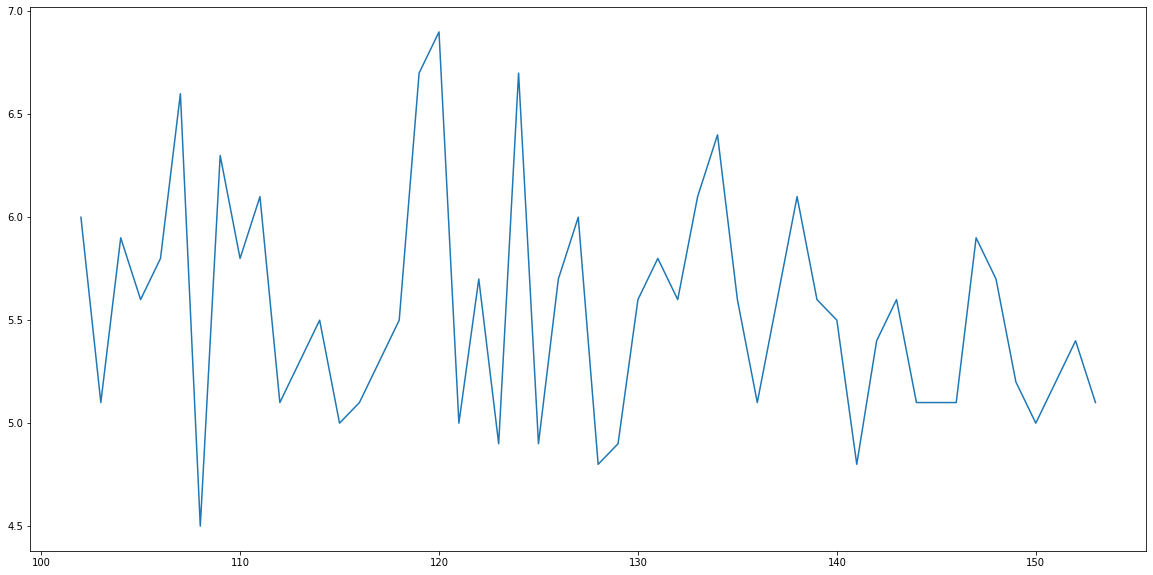

count    51.000000
mean      5.552941
std       0.546389
min       4.500000
25%       5.100000
50%       5.600000
75%       5.850000
max       6.900000
Name: Comprimento_Petal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


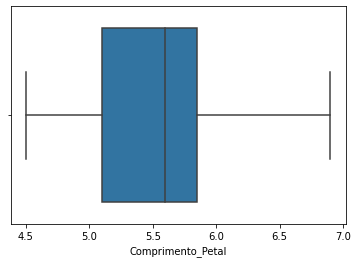

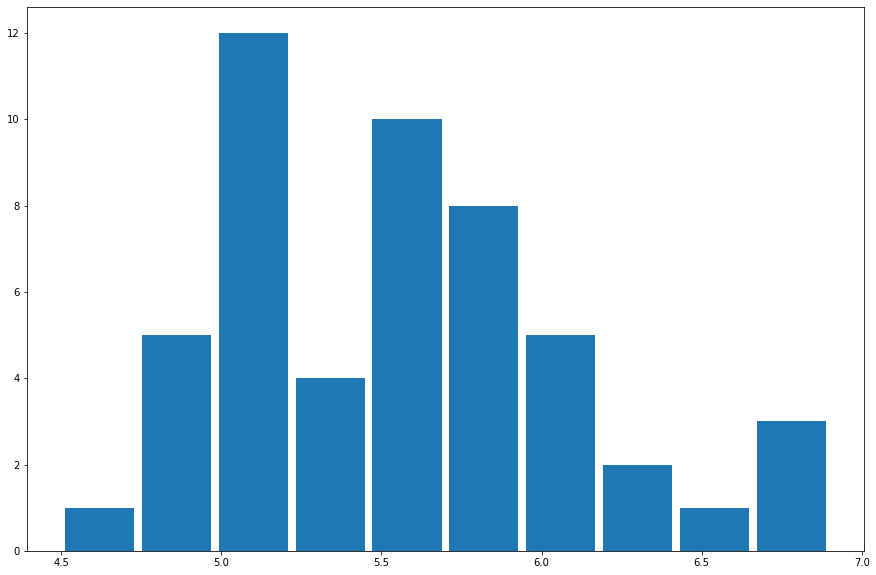

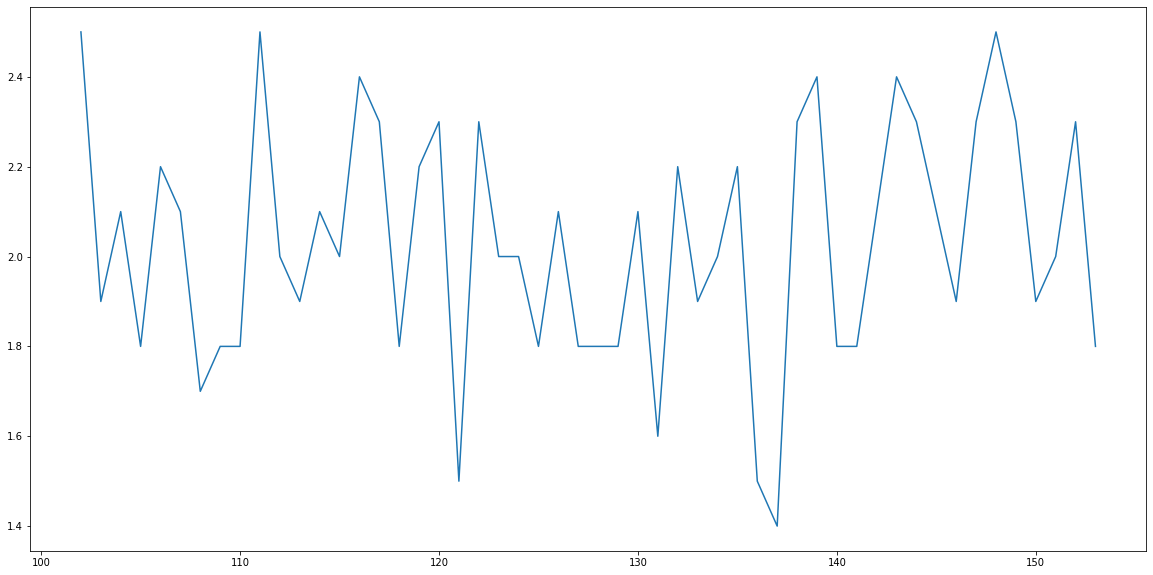

count    51.000000
mean      2.029412
std       0.272979
min       1.400000
25%       1.800000
50%       2.000000
75%       2.300000
max       2.500000
Name: Largura_Petal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


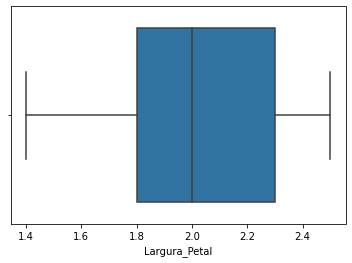

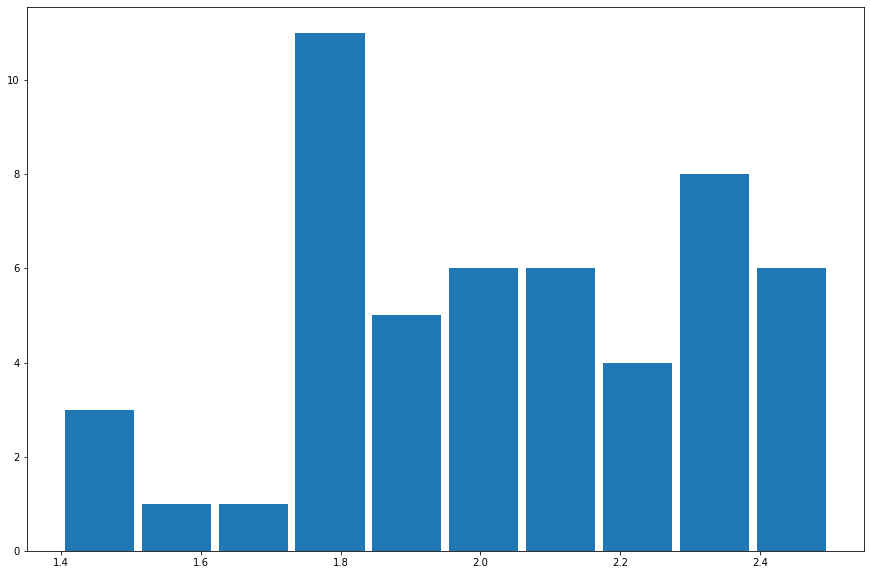

Mínimo ANTES do filtro:  2.2
Máximo ANTES do filtro:  7.9
Total de dados ANTES do filtro:  51

Mínimo DEPOIS do filtro:  5.6
Máximo DEPOIS do filtro:  7.9
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


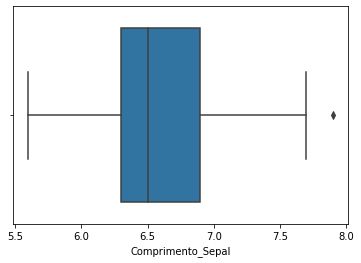

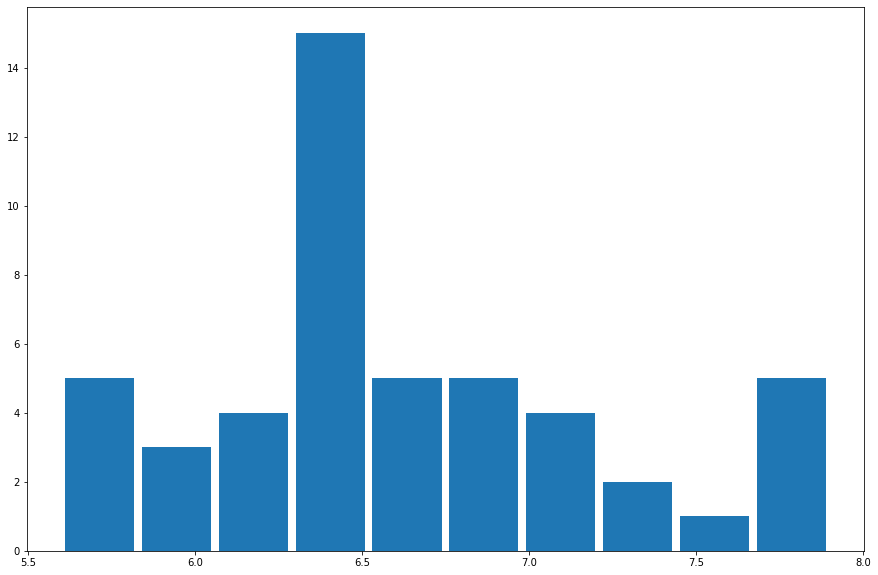

Mínimo ANTES do filtro:  2.2
Máximo ANTES do filtro:  3.8
Total de dados ANTES do filtro:  49

Mínimo DEPOIS do filtro:  2.2
Máximo DEPOIS do filtro:  3.8
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


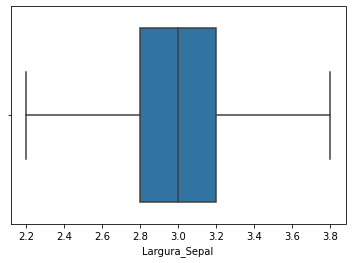

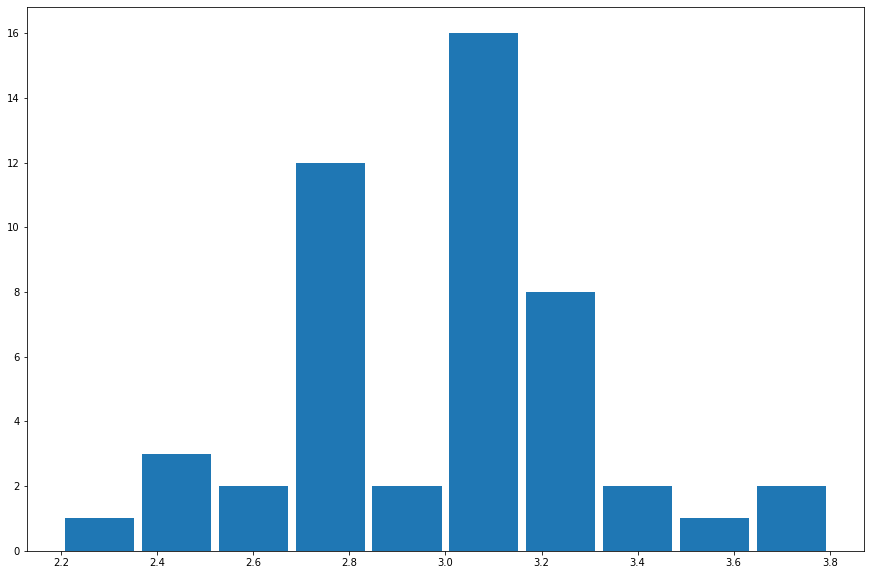

Mínimo ANTES do filtro:  4.8
Máximo ANTES do filtro:  6.9
Total de dados ANTES do filtro:  49

Mínimo DEPOIS do filtro:  4.8
Máximo DEPOIS do filtro:  6.9
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


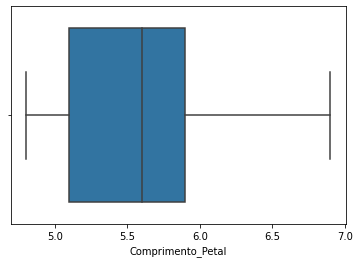

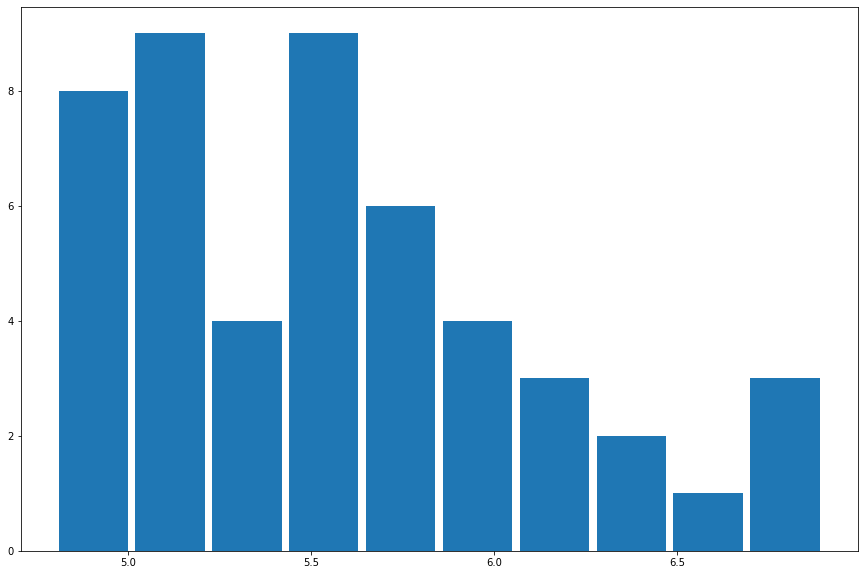

Mínimo ANTES do filtro:  1.4
Máximo ANTES do filtro:  2.5
Total de dados ANTES do filtro:  49

Mínimo DEPOIS do filtro:  1.4
Máximo DEPOIS do filtro:  2.5
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


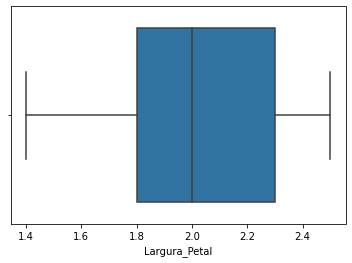

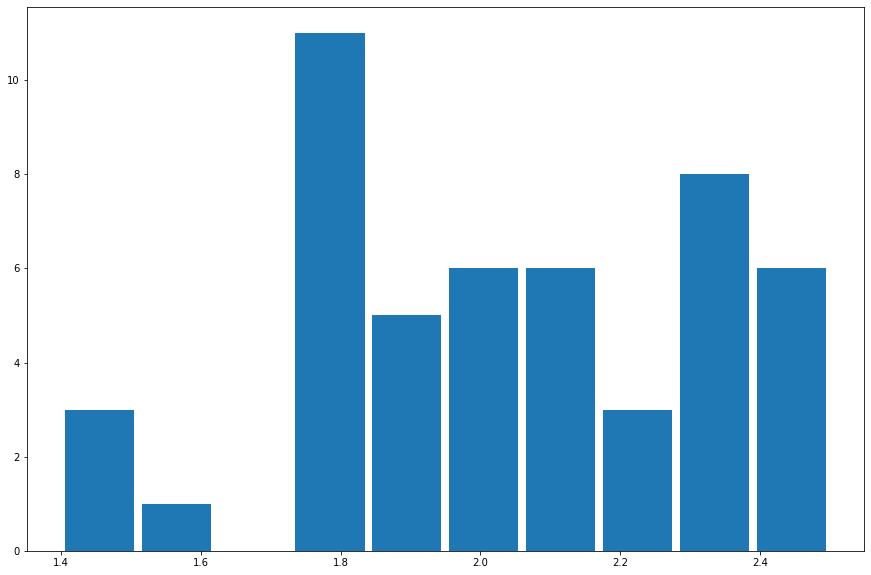

In [19]:
## ANALISE EXPLORATÓRIA VIA GRÁFICOS E DADOS ESTATÍSTICOS PARA ANALISAR CADA UMA DAS CLASSES ###

# Iris_virginica

plotar_grafico_linha(df_Iris_virginica["Comprimento_Sepal"])
apresenta_estatisticas(df_Iris_virginica["Comprimento_Sepal"])
plotar_grafico_boxplot(df_Iris_virginica["Comprimento_Sepal"])
plotar_grafico_histograma(df_Iris_virginica["Comprimento_Sepal"])

plotar_grafico_linha(df_Iris_virginica["Largura_Sepal"])
apresenta_estatisticas(df_Iris_virginica["Largura_Sepal"])
plotar_grafico_boxplot(df_Iris_virginica["Largura_Sepal"])
plotar_grafico_histograma(df_Iris_virginica["Largura_Sepal"])


plotar_grafico_linha(df_Iris_virginica["Comprimento_Petal"])
apresenta_estatisticas(df_Iris_virginica["Comprimento_Petal"])
plotar_grafico_boxplot(df_Iris_virginica["Comprimento_Petal"])
plotar_grafico_histograma(df_Iris_virginica["Comprimento_Petal"])


plotar_grafico_linha(df_Iris_virginica["Largura_Petal"])
apresenta_estatisticas(df_Iris_virginica["Largura_Petal"])
plotar_grafico_boxplot(df_Iris_virginica["Largura_Petal"])
plotar_grafico_histograma(df_Iris_virginica["Largura_Petal"])

## EXCLUINDO OUTLIERS USANDO A TÉCNICA DE QUARTIL ###

# Iris_virginica - Comprimento_Sepal 

df_Iris_virginica_pre_filtro = df_Iris_virginica

df_Iris_virginica_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_virginica_filtrado["Comprimento_Sepal"])

plotar_grafico_histograma(df_Iris_virginica_filtrado["Comprimento_Sepal"])


# Iris_virginica - Largura_Sepal 

df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_virginica_filtrado["Largura_Sepal"])

plotar_grafico_histograma(df_Iris_virginica_filtrado["Largura_Sepal"])

# Iris_virginica - Comprimento_Petal 

df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_virginica_filtrado["Comprimento_Petal"])

plotar_grafico_histograma(df_Iris_virginica_filtrado["Comprimento_Petal"])

# Iris_virginica - Largura_Petal 

df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_virginica_filtrado["Largura_Petal"])

plotar_grafico_histograma(df_Iris_virginica_filtrado["Largura_Petal"])

##### Analise Iris Versicolor

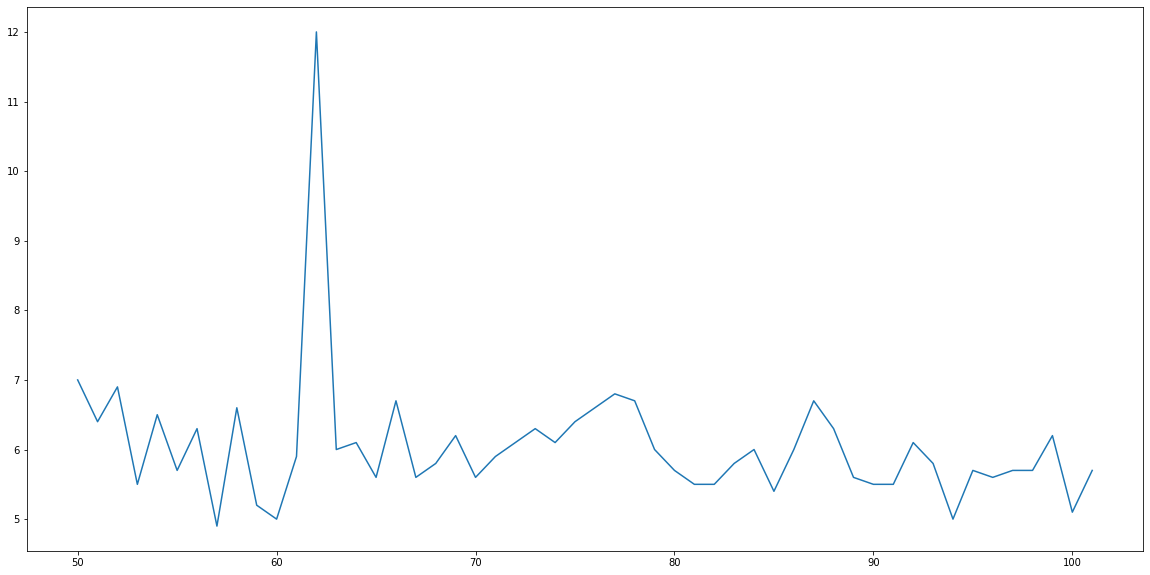

count    52.000000
mean      6.048077
std       0.982492
min       4.900000
25%       5.600000
50%       5.900000
75%       6.300000
max      12.000000
Name: Comprimento_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


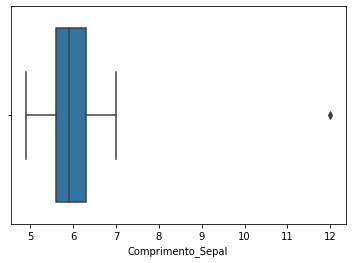

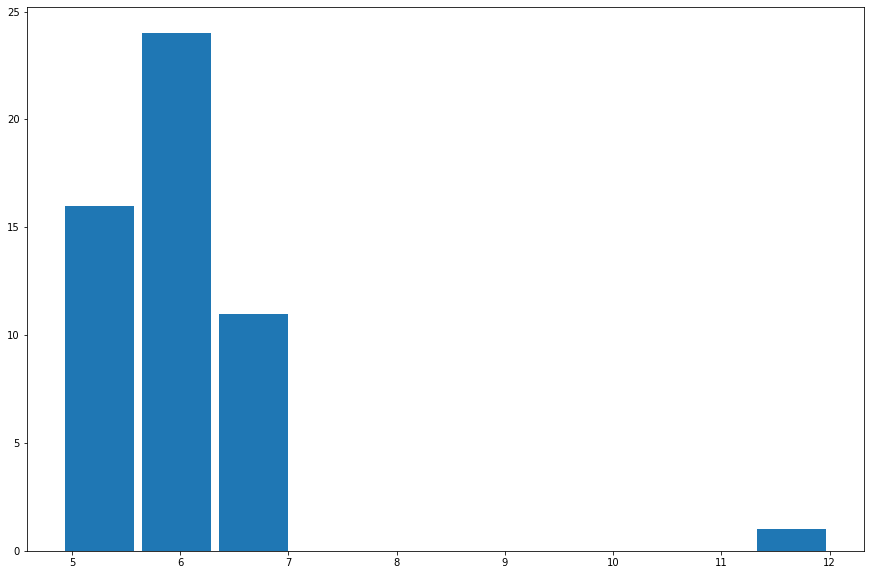

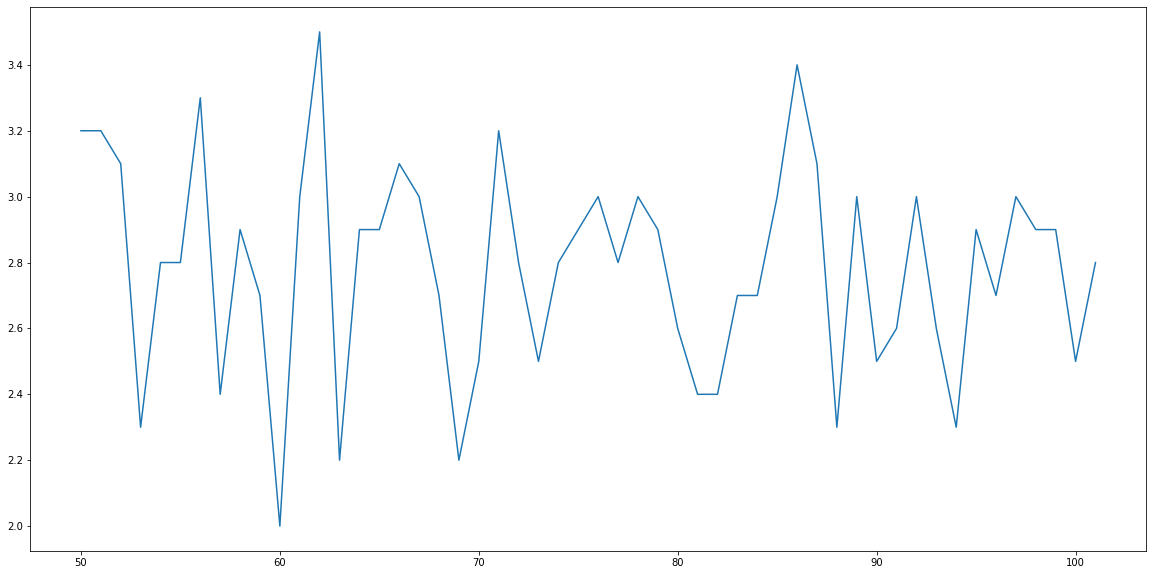

count    52.000000
mean      2.786538
std       0.324206
min       2.000000
25%       2.575000
50%       2.800000
75%       3.000000
max       3.500000
Name: Largura_Sepal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


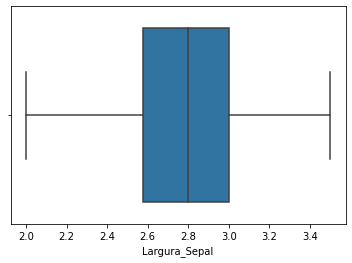

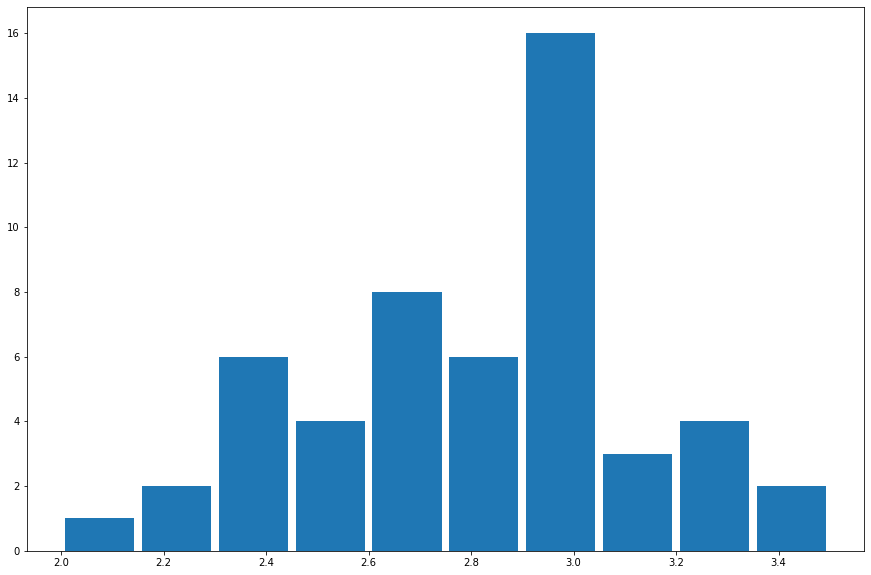

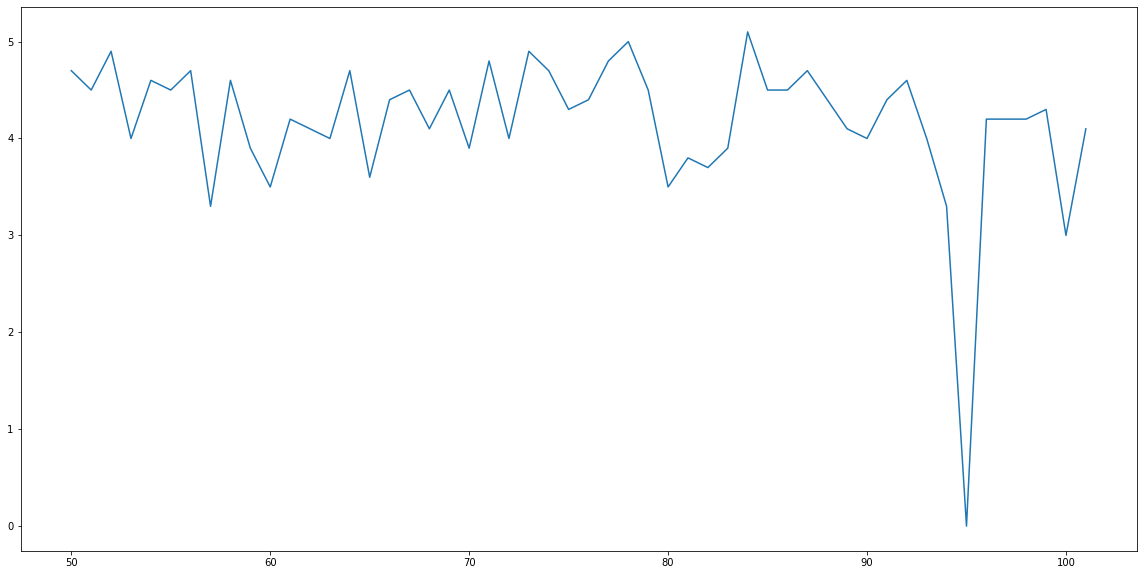

count    52.000000
mean      4.175000
std       0.749084
min       0.000000
25%       4.000000
50%       4.300000
75%       4.600000
max       5.100000
Name: Comprimento_Petal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


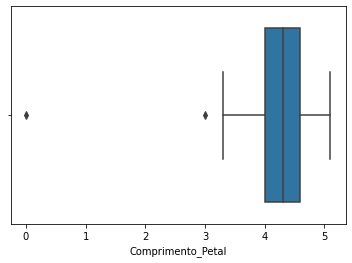

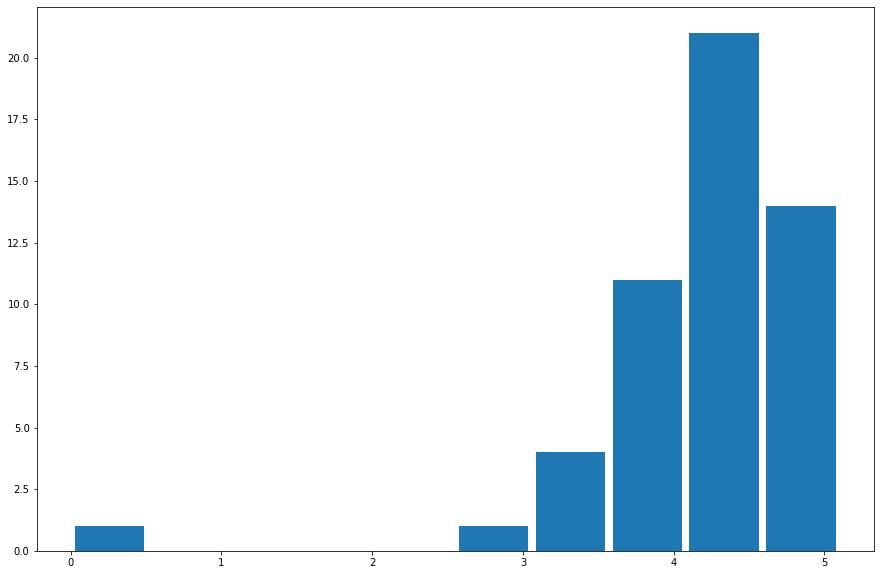

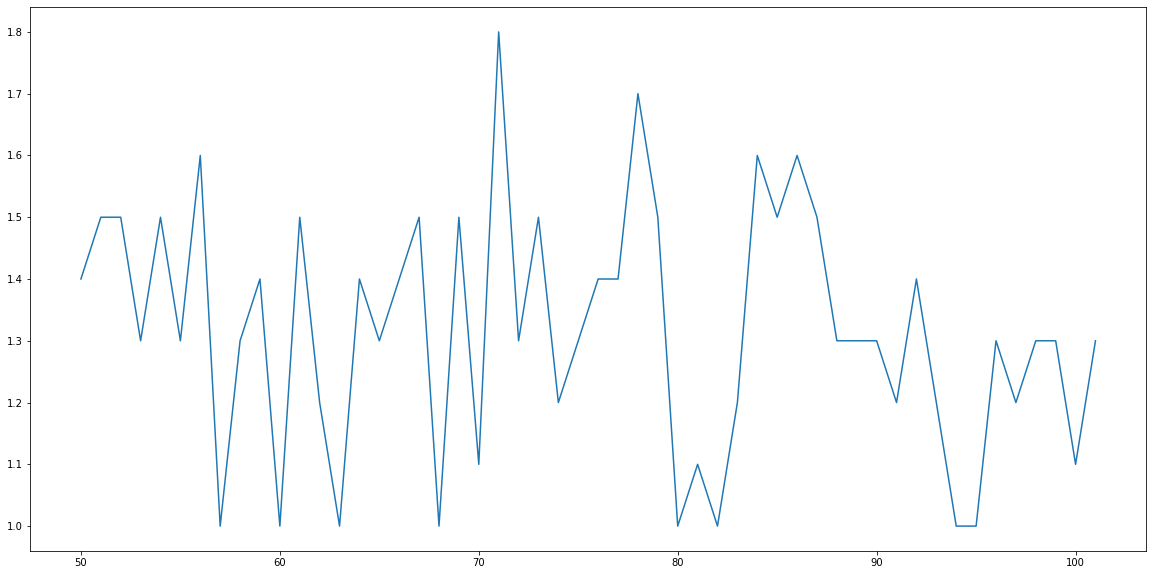

count    52.000000
mean      1.317308
std       0.199726
min       1.000000
25%       1.200000
50%       1.300000
75%       1.500000
max       1.800000
Name: Largura_Petal, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


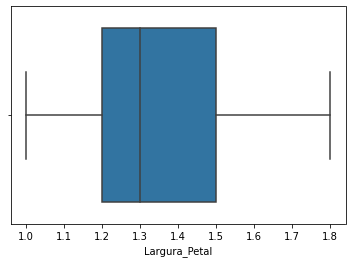

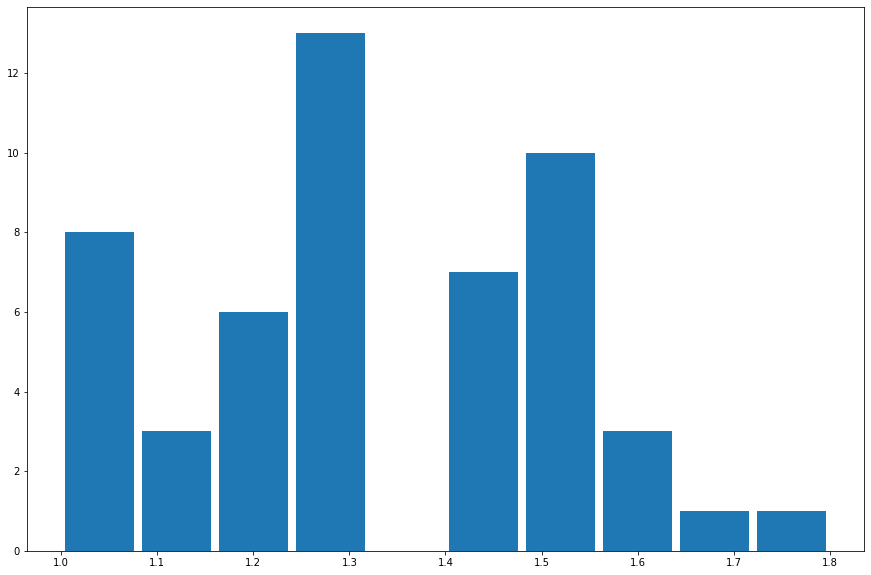

Mínimo ANTES do filtro:  4.9
Máximo ANTES do filtro:  12.0
Total de dados ANTES do filtro:  52

Mínimo DEPOIS do filtro:  4.9
Máximo DEPOIS do filtro:  7.0
Total de dados DEPOIS do filtro:  51


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


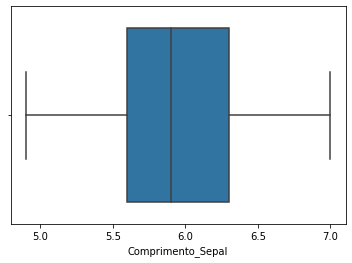

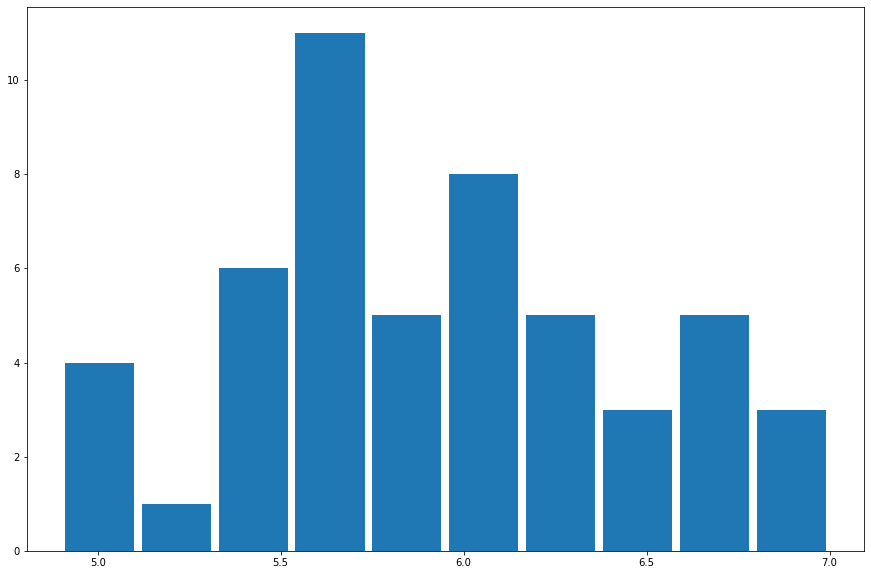

Mínimo ANTES do filtro:  2.0
Máximo ANTES do filtro:  3.4
Total de dados ANTES do filtro:  51

Mínimo DEPOIS do filtro:  2.0
Máximo DEPOIS do filtro:  3.4
Total de dados DEPOIS do filtro:  51


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


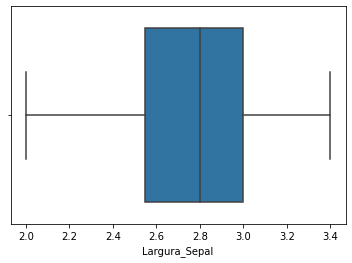

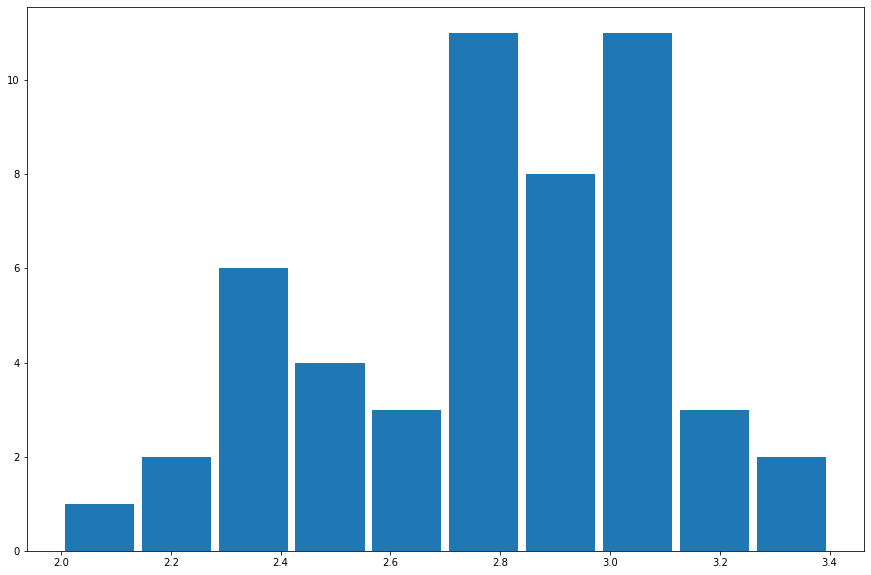

Mínimo ANTES do filtro:  0.0
Máximo ANTES do filtro:  5.1
Total de dados ANTES do filtro:  51

Mínimo DEPOIS do filtro:  3.3
Máximo DEPOIS do filtro:  5.1
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


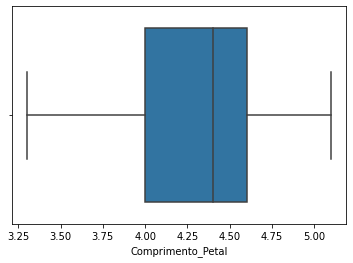

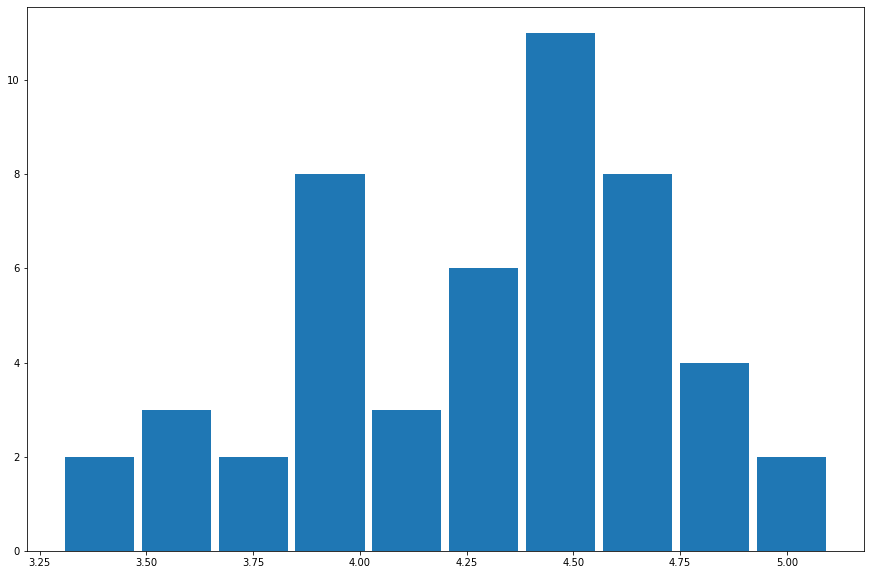

Mínimo ANTES do filtro:  1.0
Máximo ANTES do filtro:  1.8
Total de dados ANTES do filtro:  49

Mínimo DEPOIS do filtro:  1.0
Máximo DEPOIS do filtro:  1.8
Total de dados DEPOIS do filtro:  49


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


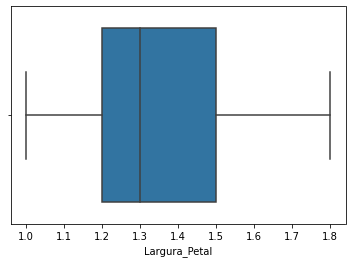

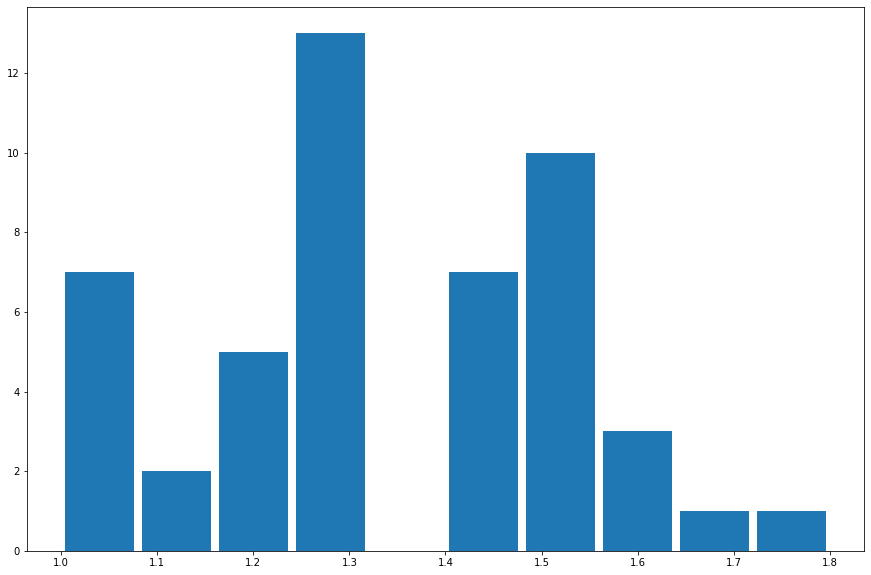

In [20]:
## ANALISE EXPLORATÓRIA VIA GRÁFICOS E DADOS ESTATÍSTICOS PARA ANALISAR CADA UMA DAS CLASSES ###

# Iris_versicolor

plotar_grafico_linha(df_Iris_versicolor["Comprimento_Sepal"])
apresenta_estatisticas(df_Iris_versicolor["Comprimento_Sepal"])
plotar_grafico_boxplot(df_Iris_versicolor["Comprimento_Sepal"])
plotar_grafico_histograma(df_Iris_versicolor["Comprimento_Sepal"])

plotar_grafico_linha(df_Iris_versicolor["Largura_Sepal"])
apresenta_estatisticas(df_Iris_versicolor["Largura_Sepal"])
plotar_grafico_boxplot(df_Iris_versicolor["Largura_Sepal"])
plotar_grafico_histograma(df_Iris_versicolor["Largura_Sepal"])


plotar_grafico_linha(df_Iris_versicolor["Comprimento_Petal"])
apresenta_estatisticas(df_Iris_versicolor["Comprimento_Petal"])
plotar_grafico_boxplot(df_Iris_versicolor["Comprimento_Petal"])
plotar_grafico_histograma(df_Iris_versicolor["Comprimento_Petal"])


plotar_grafico_linha(df_Iris_versicolor["Largura_Petal"])
apresenta_estatisticas(df_Iris_versicolor["Largura_Petal"])
plotar_grafico_boxplot(df_Iris_versicolor["Largura_Petal"])
plotar_grafico_histograma(df_Iris_versicolor["Largura_Petal"])

## EXCLUINDO OUTLIERS USANDO A TÉCNICA DE QUARTIL ###

# df_Iris_versicolor - Comprimento_Sepal 

df_Iris_versicolor_pre_filtro = df_Iris_versicolor

df_Iris_versicolor_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_versicolor_filtrado["Comprimento_Sepal"])

plotar_grafico_histograma(df_Iris_versicolor_filtrado["Comprimento_Sepal"])


# df_Iris_versicolor - Largura_Sepal 

df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_versicolor_filtrado["Largura_Sepal"])

plotar_grafico_histograma(df_Iris_versicolor_filtrado["Largura_Sepal"])

# df_Iris_versicolor - Comprimento_Petal 

df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_versicolor_filtrado["Comprimento_Petal"])

plotar_grafico_histograma(df_Iris_versicolor_filtrado["Comprimento_Petal"])

# df_Iris_versicolor - Largura_Petal 

df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

plotar_grafico_boxplot(df_Iris_versicolor_filtrado["Largura_Petal"])

plotar_grafico_histograma(df_Iris_versicolor_filtrado["Largura_Petal"])